In [1]:
from sotip import *



In [2]:
data_path = 'data/to/h5ad/ST_zebrofish/h5ad'

data_file = 'sample_B.h5ad'
adata = ad.read_h5ad(f'{data_path}/{data_file}')


In [3]:
adata.obsm['spatial'] = adata.obsm['spatial_real']

In [4]:
sc.pp.recipe_seurat(adata)

In [333]:
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [5]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

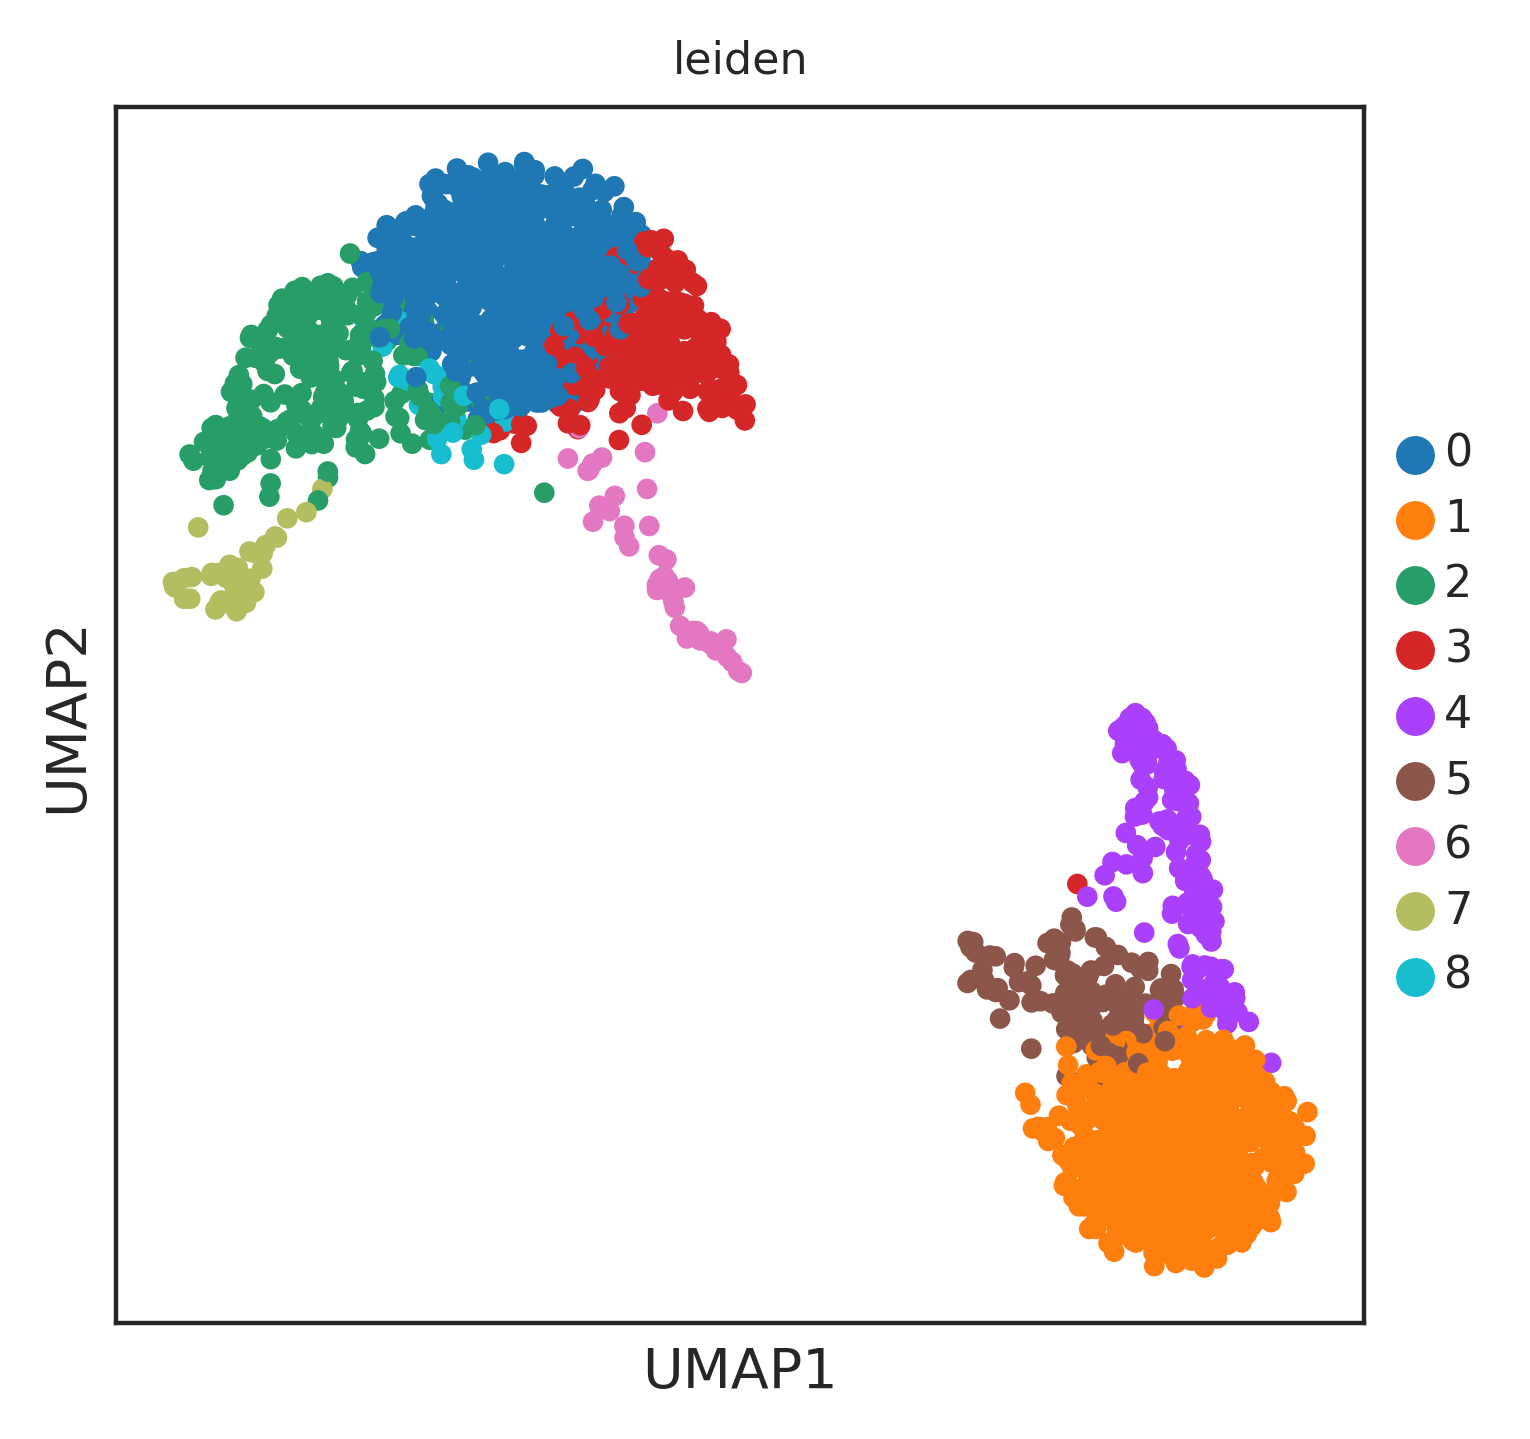

In [6]:
sc.pl.umap(adata,color=['leiden'])

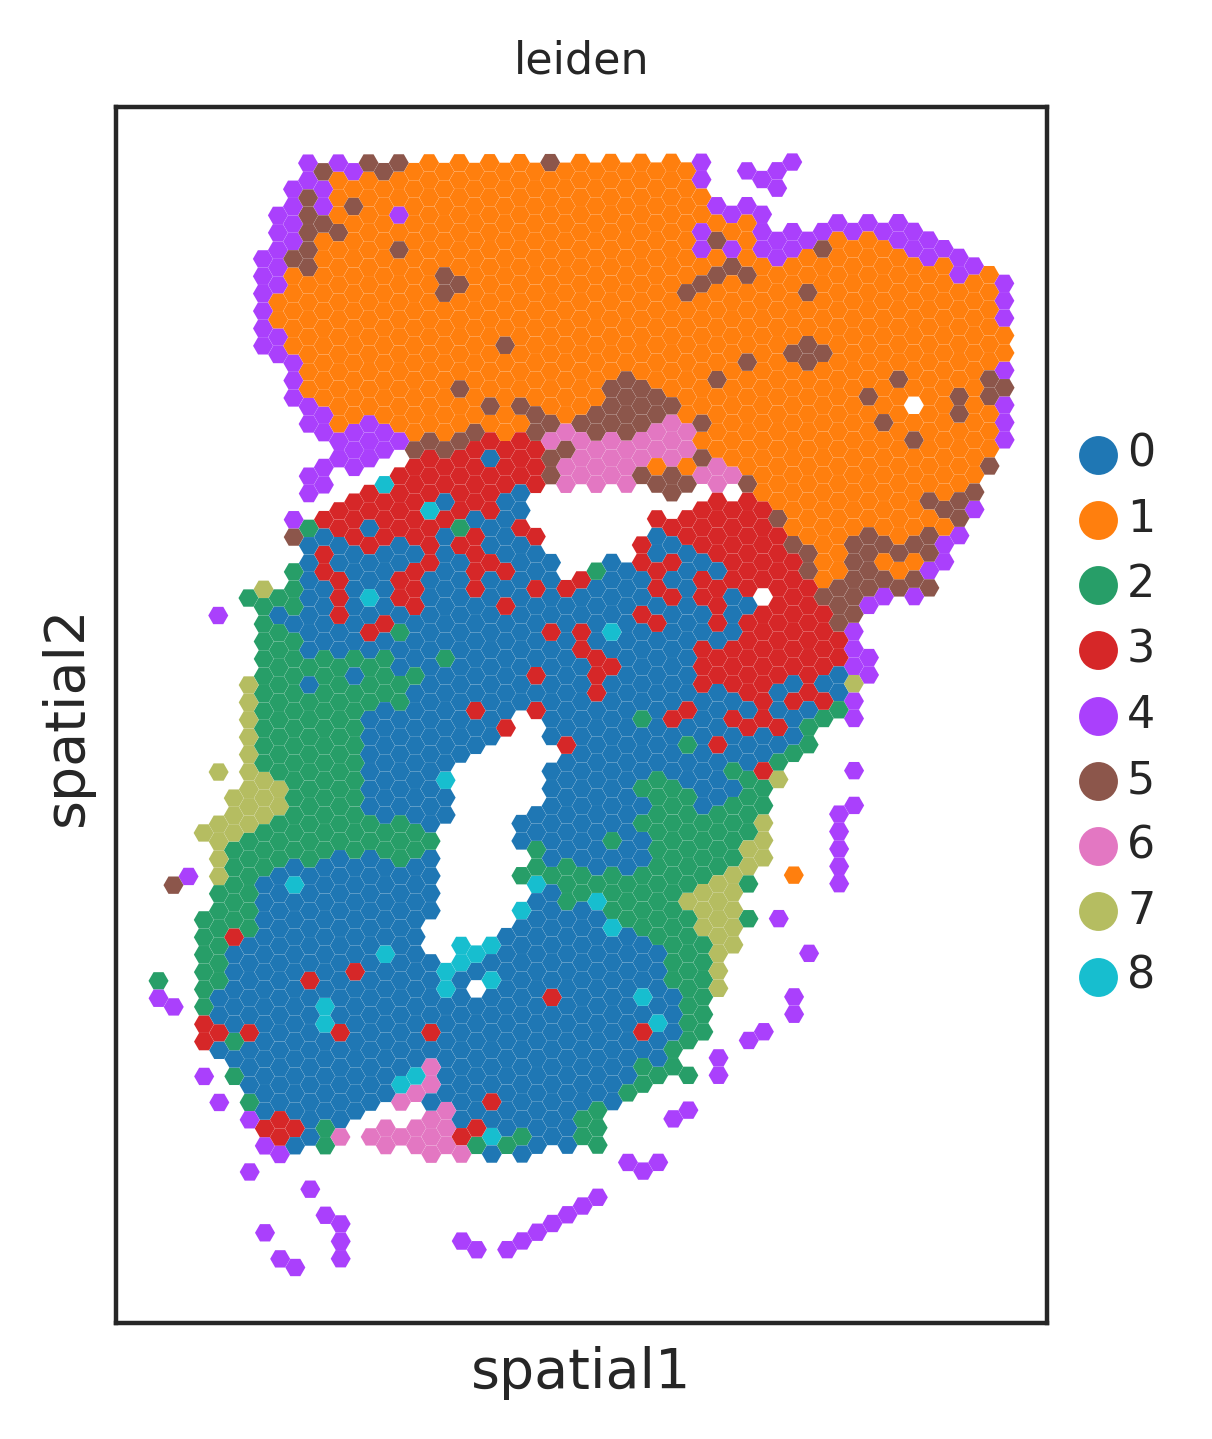

In [7]:
sc.pl.embedding(adata,basis='spatial',color=['leiden'],show=False,size=13,marker='H')
plt.gca().set_aspect('equal', adjustable='box') 


In [8]:
knn = 10
spatial_var='spatial'
cls_key='leiden'
# ME_var_names_np_unique = np.unique(adata.obs[cls_key]) 
ME_var_names_np_unique = np.array(adata.obs[cls_key].cat.categories)

# MED_multi(adata,use_cls=cls_key,nn=knn,copy=False,spatial_var=spatial_var,batch_obs='batch')
MED(adata,use_cls=cls_key,nn=knn,copy=False,ME_var_names_np_unique=ME_var_names_np_unique,spatial_var=spatial_var) 
  


knn search time cost 0.005477428436279297 s
0 MEs,time cost 2.1457672119140625e-06 s, 2176 MEs, 4.669189453125e-06s left
1000 MEs,time cost 0.17285847663879395 s, 1176 MEs, 0.20328156852722168s left
2000 MEs,time cost 0.1585378646850586 s, 176 MEs, 0.02790266418457031s left


array([[ 0.,  7.,  0., ...,  0.,  0.,  0.],
       [ 0.,  8.,  0., ...,  0.,  0.,  0.],
       [ 0.,  5.,  0., ...,  0.,  0.,  0.],
       ...,
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [ 8.,  0.,  2., ...,  0.,  0.,  0.],
       [ 7.,  0.,  0., ...,  0.,  0.,  0.]])

## IGD

In [9]:
gd_method = 'uniform'
cls_key = 'leiden'
gd = get_ground_distance(adata,method=gd_method,cls_key=cls_key,embed_key=None,connect_threshold=0.1)  


In [10]:
heter_key = 'ME_heter_{0}_{1}'.format(cls_key,gd_method)

cal_ME_heterogeneity(adata,copy=False,key_added=heter_key) 

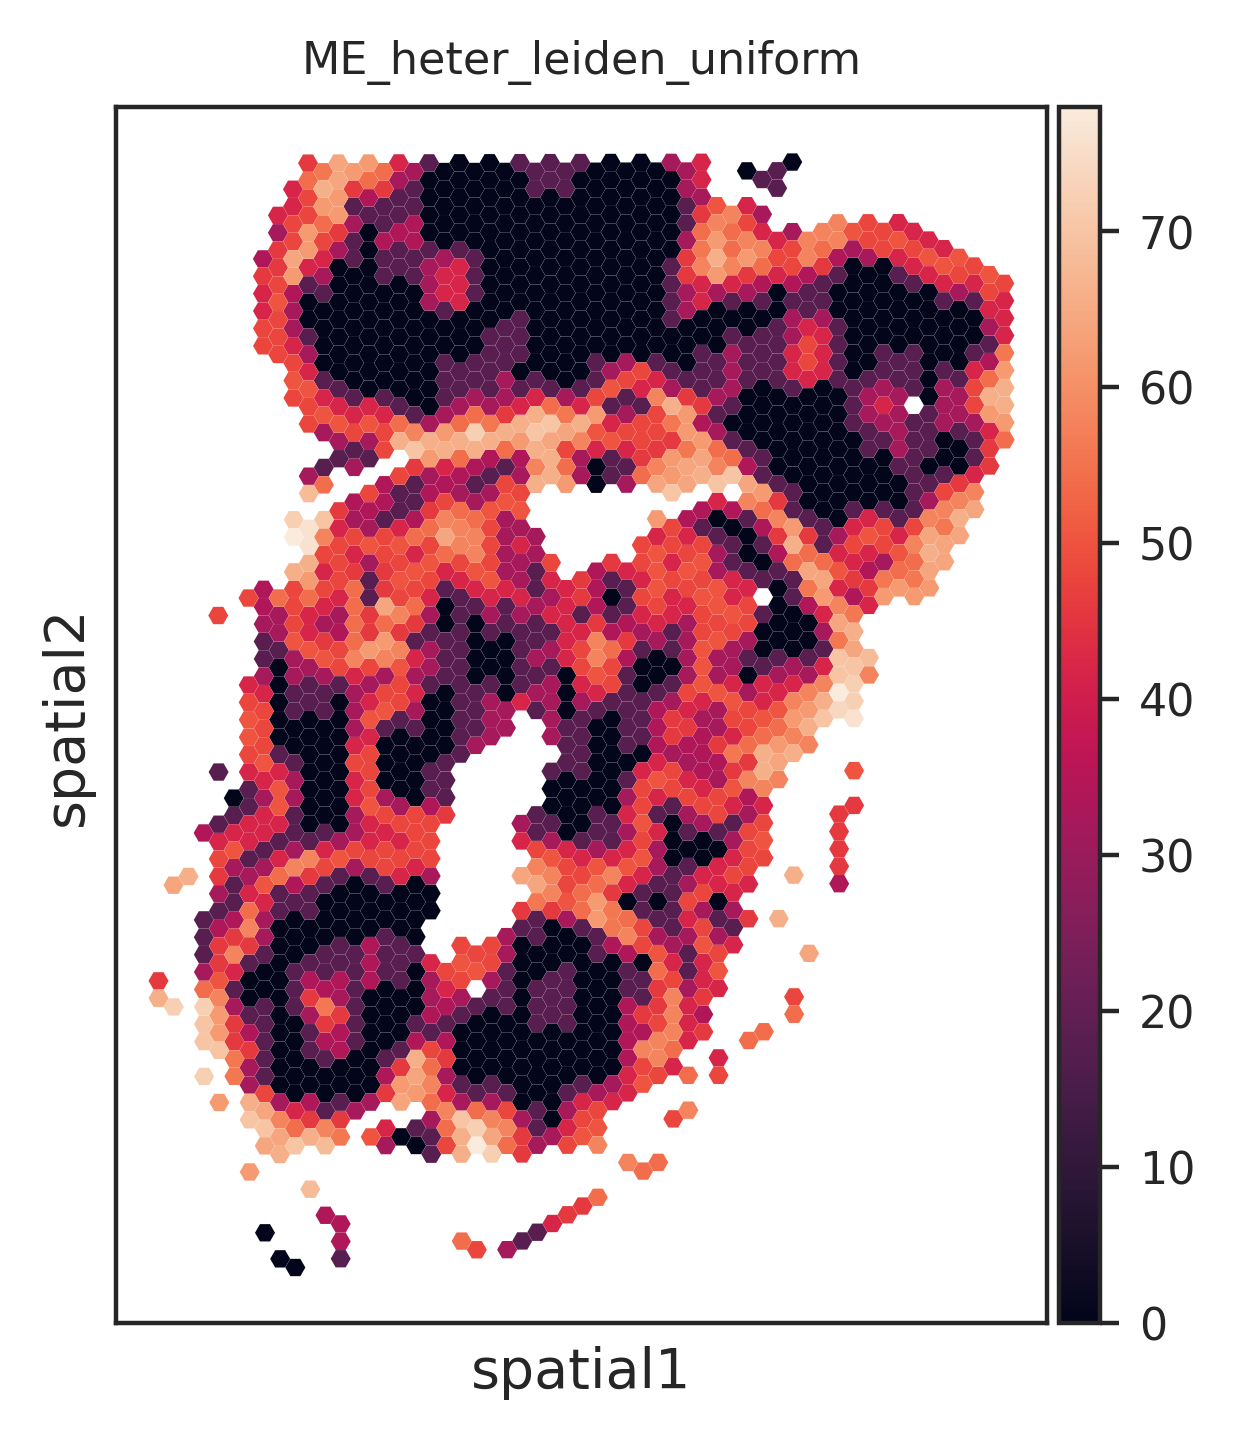

In [11]:
sc.pl.embedding(adata,basis='spatial',color=[heter_key],show=False,size=13,marker='H')
plt.gca().set_aspect('equal', adjustable='box') 


## NUCC

In [12]:
from toolz import compose

cls_count = np.apply_along_axis(compose(len, np.unique), 1, adata.obsm['ME'])
gd_method = 'clsCount'
heter_key = 'ME_heter_{0}_{1}'.format(cls_key,gd_method)
adata.obs[heter_key] = cls_count

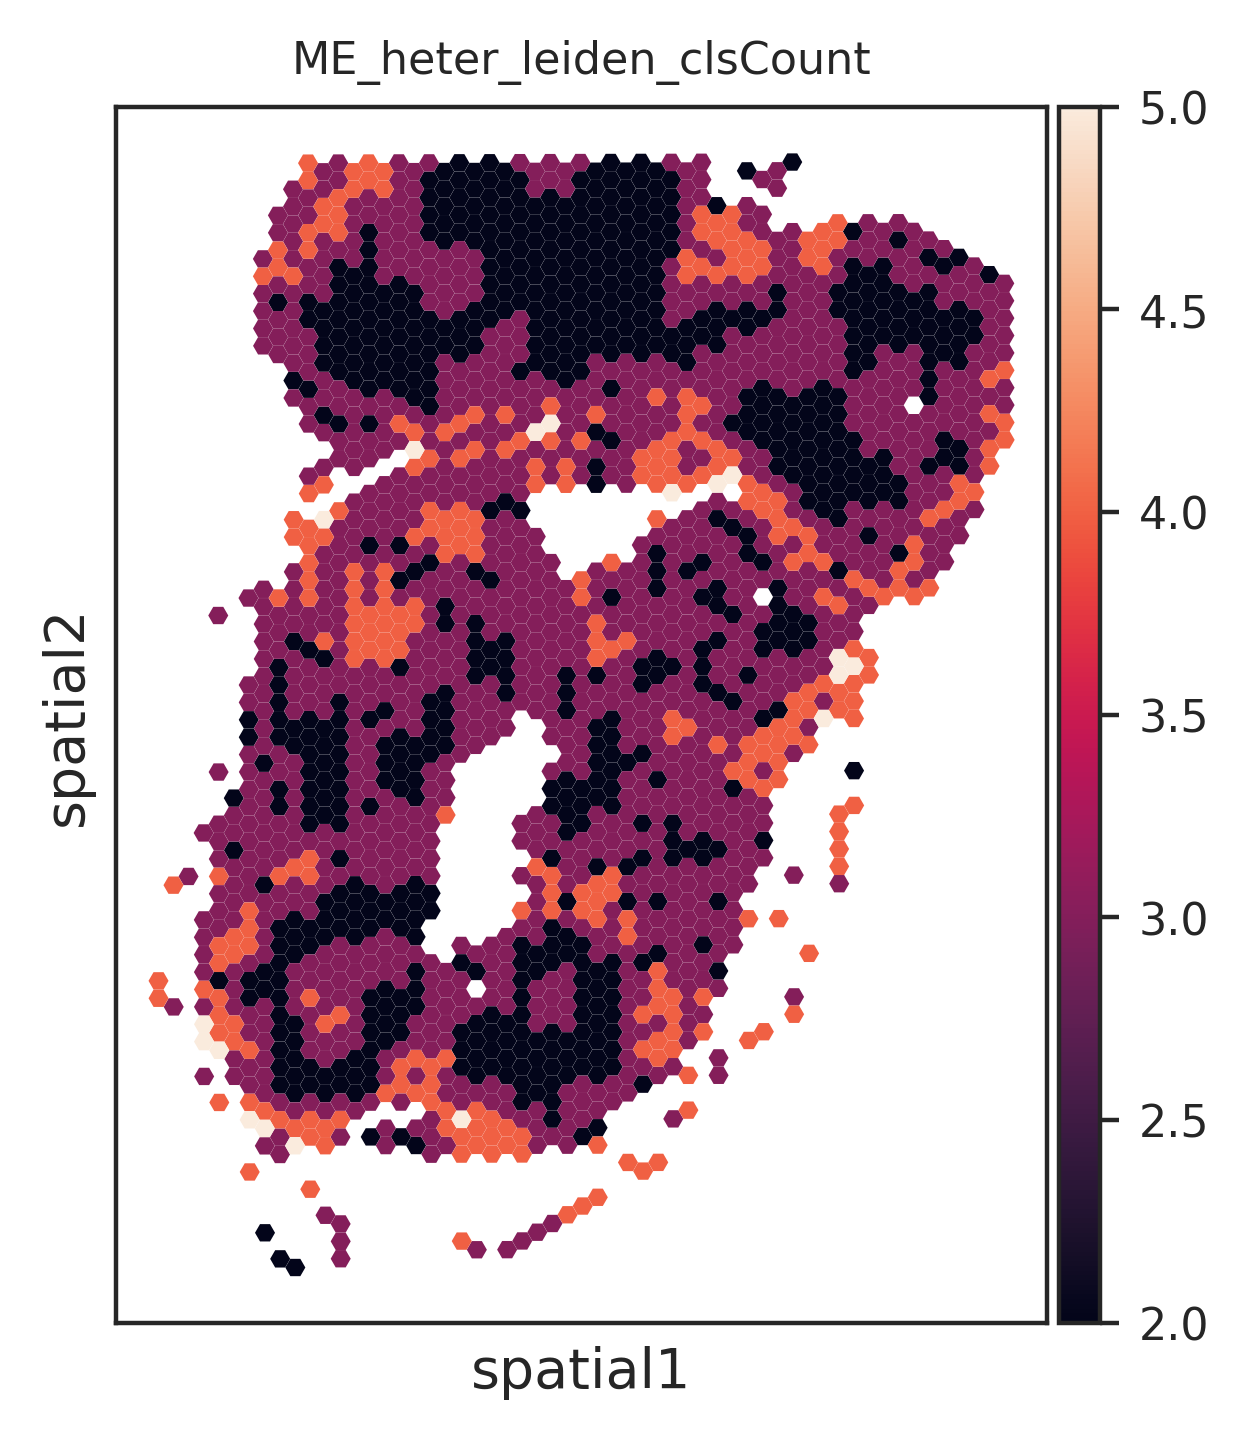

In [13]:
sc.pl.embedding(adata,basis='spatial',color=[heter_key],show=False,size=13,marker='H')
plt.gca().set_aspect('equal', adjustable='box') 


## SOTIP

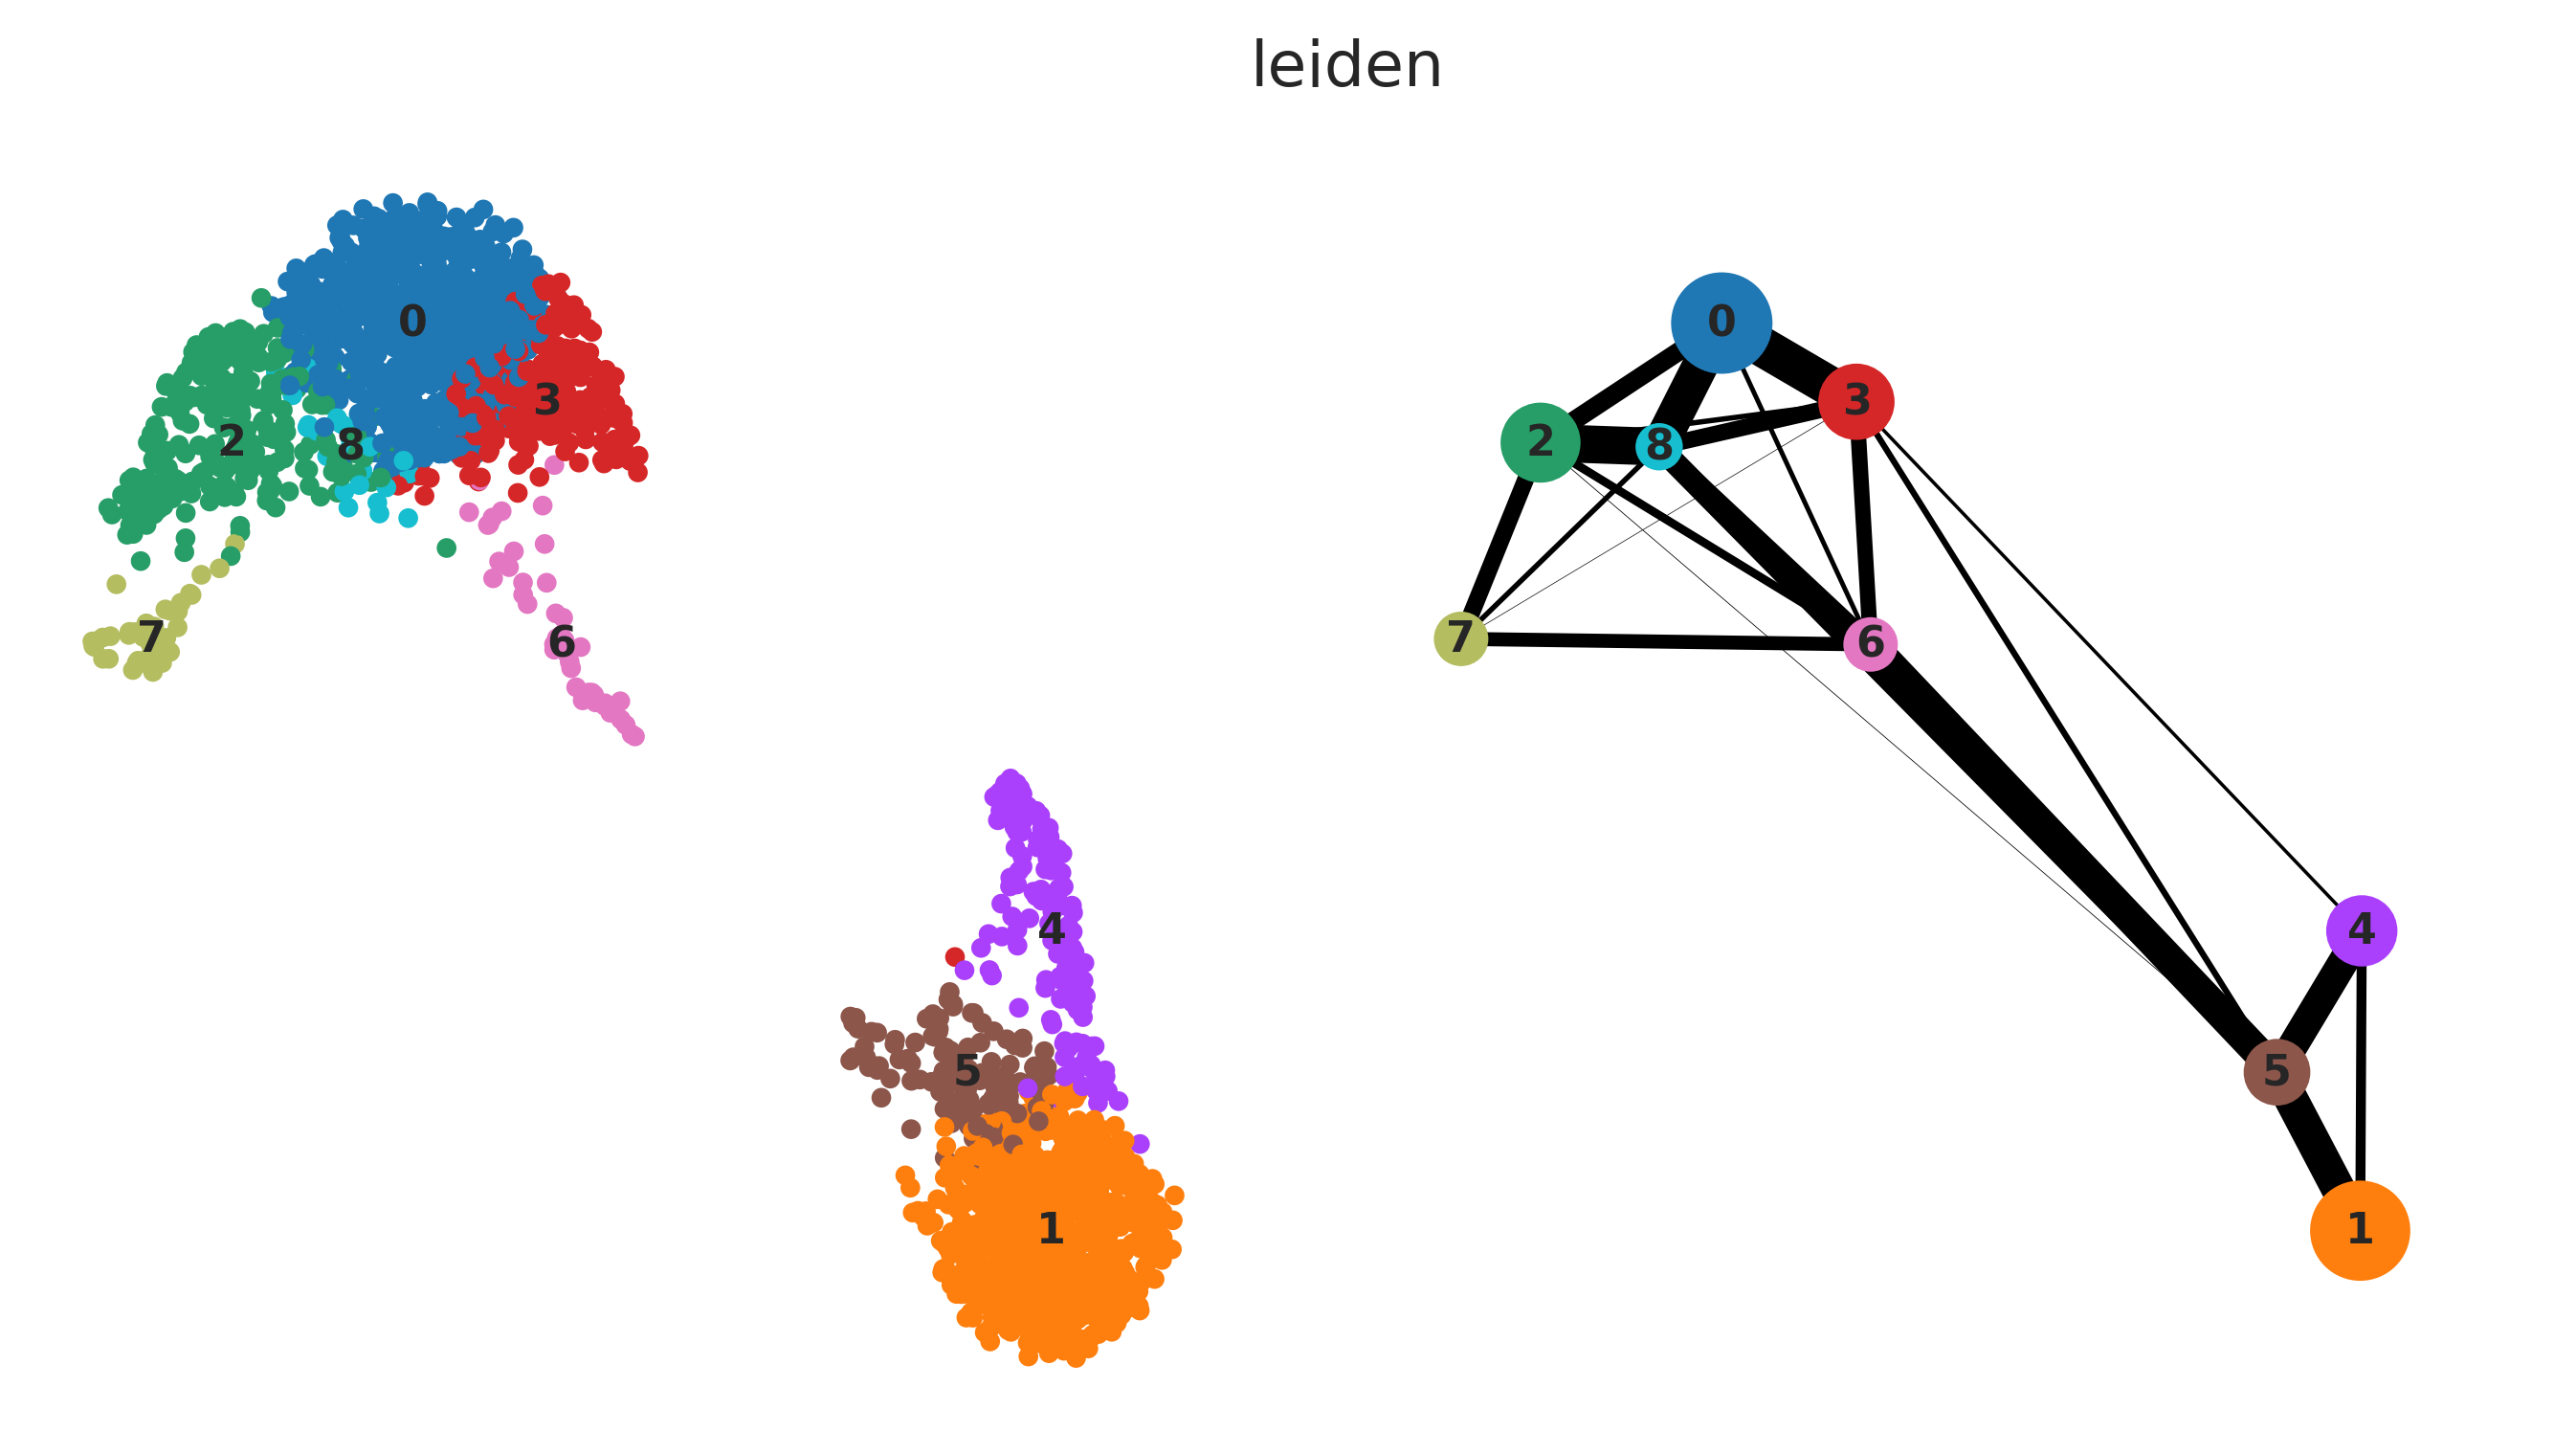

In [14]:
cls_key = 'leiden'
sc.tl.paga(adata,groups=cls_key)
sc.pl.paga_compare(adata,basis='X_umap')

In [15]:
gd_method = 'paga_guided_umap'
gd = get_ground_distance(adata,method=gd_method,cls_key=cls_key,embed_key=None,connect_threshold=0.1)  


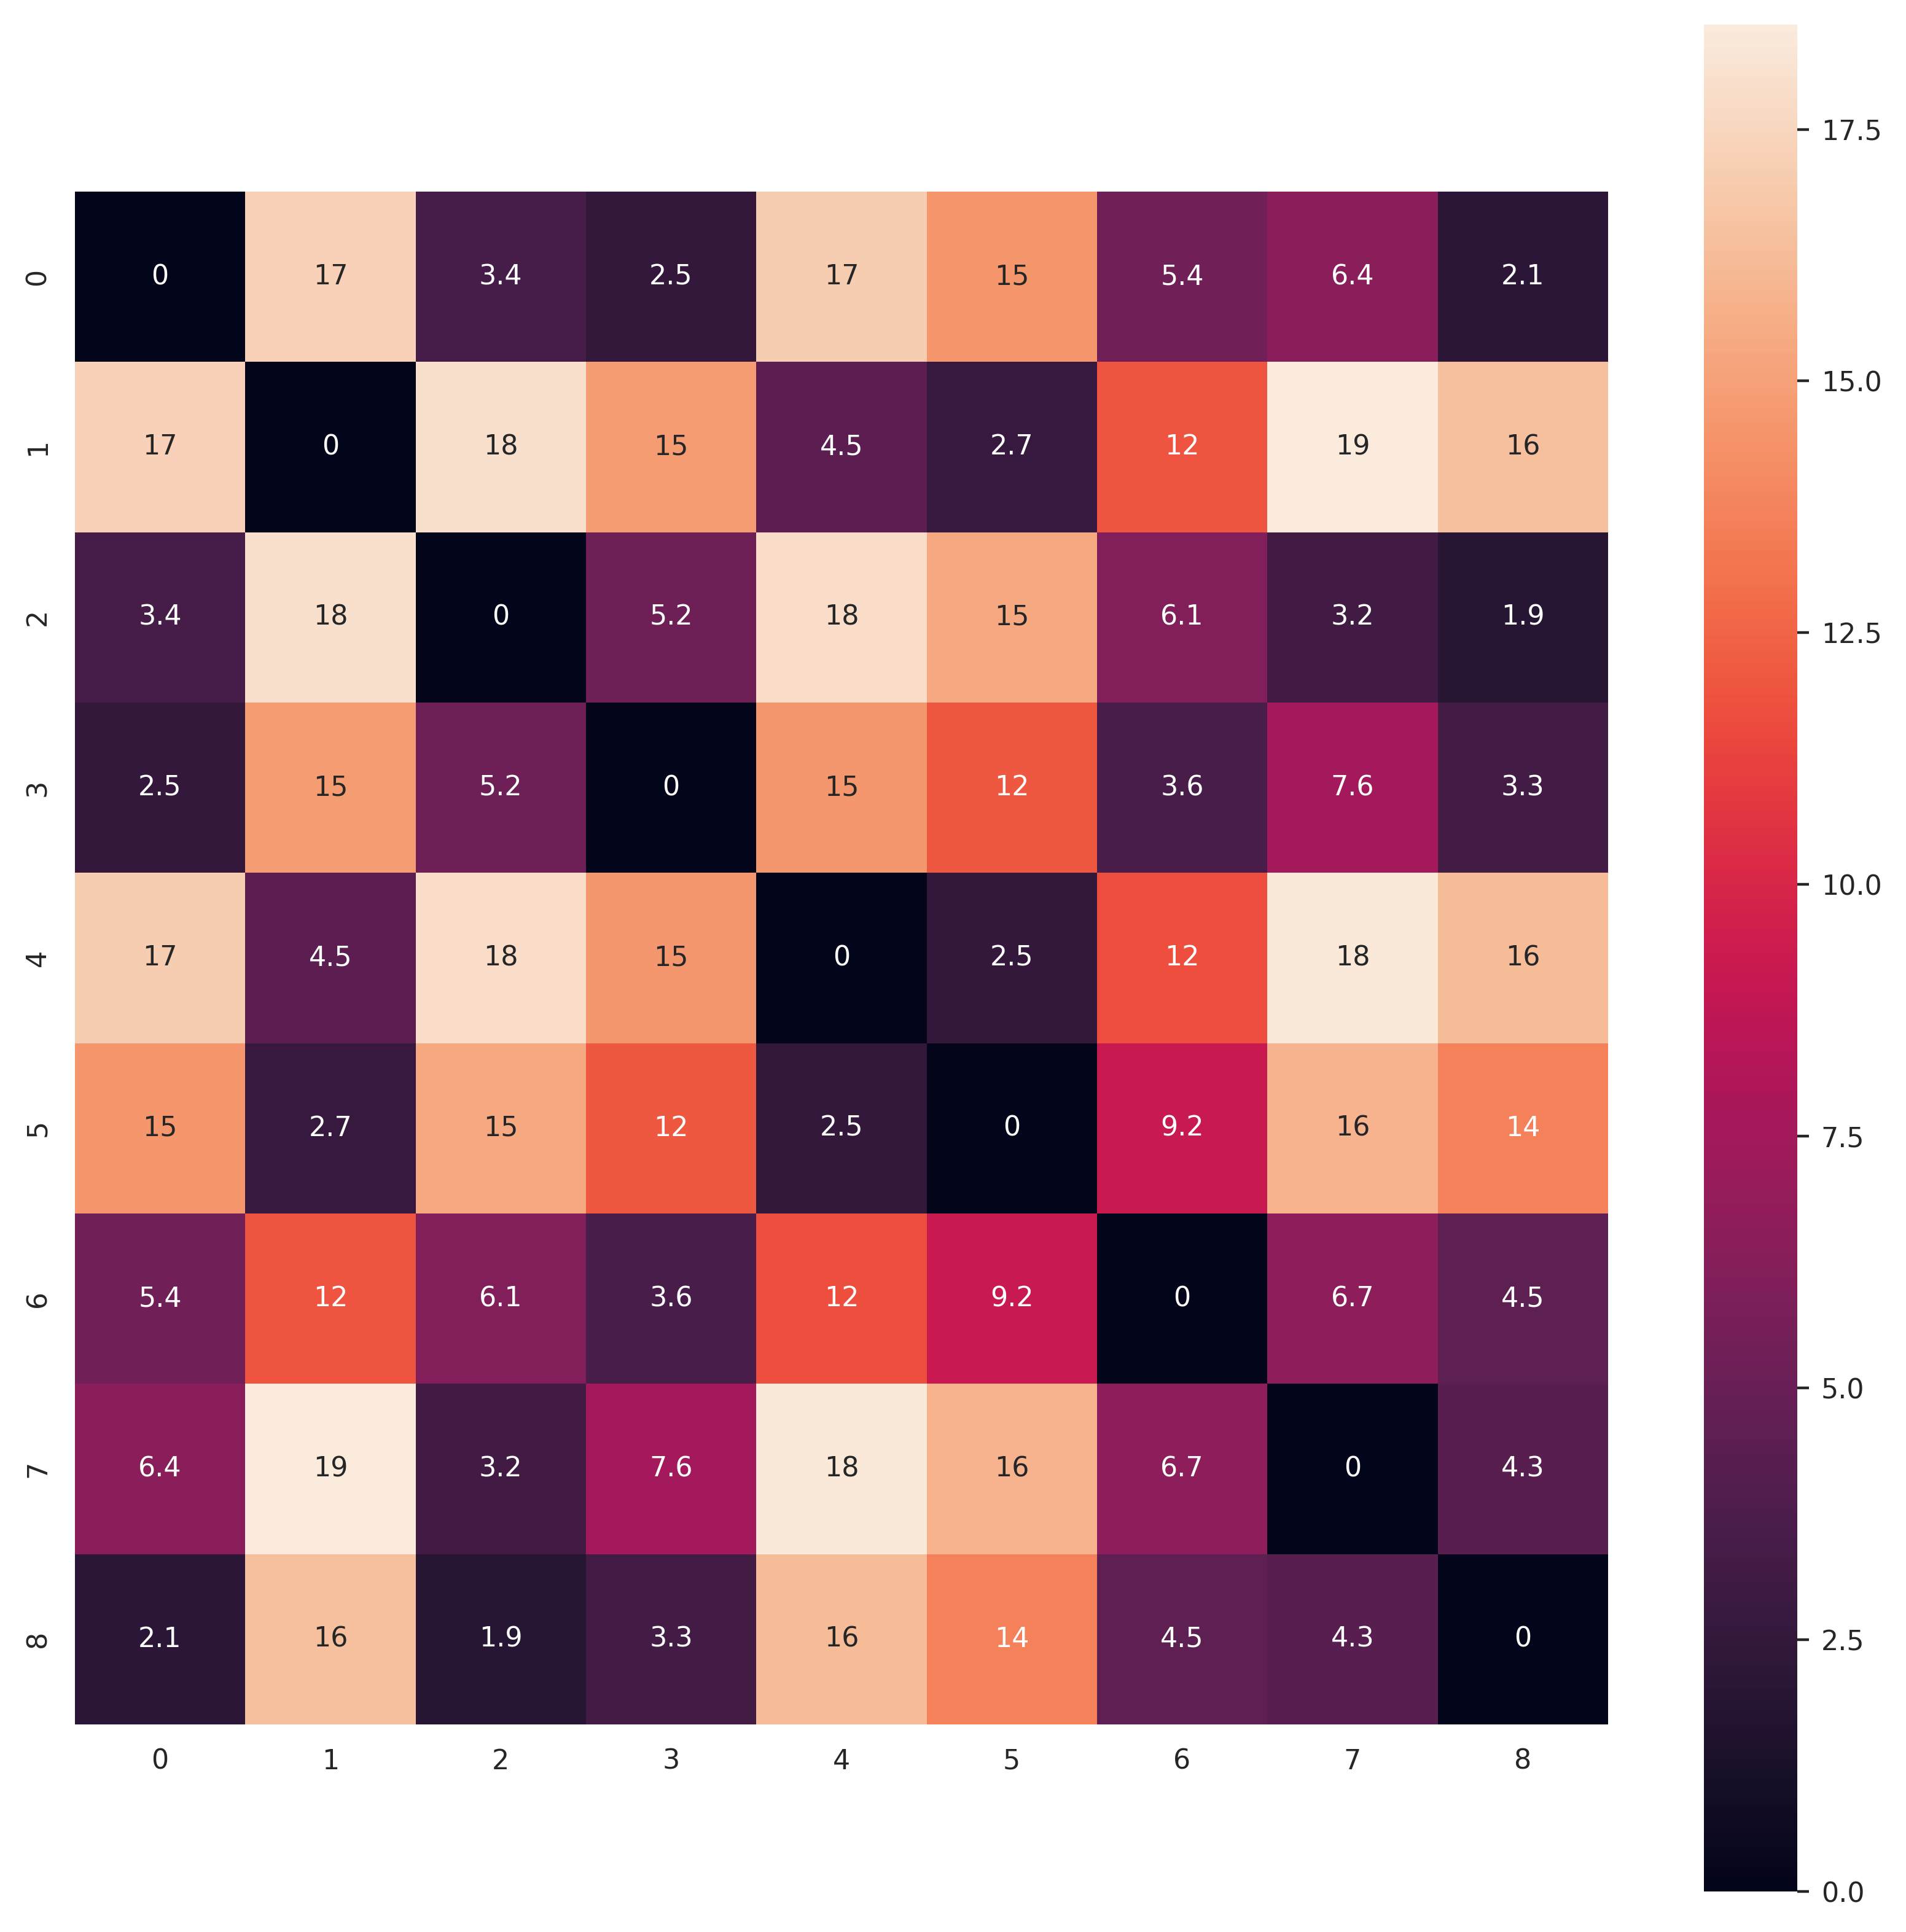

In [16]:
plot_matrix(gd)

In [17]:
heter_key = 'ME_heter_{0}_{1}'.format(cls_key,gd_method)

cal_ME_heterogeneity(adata,copy=False,key_added=heter_key) 

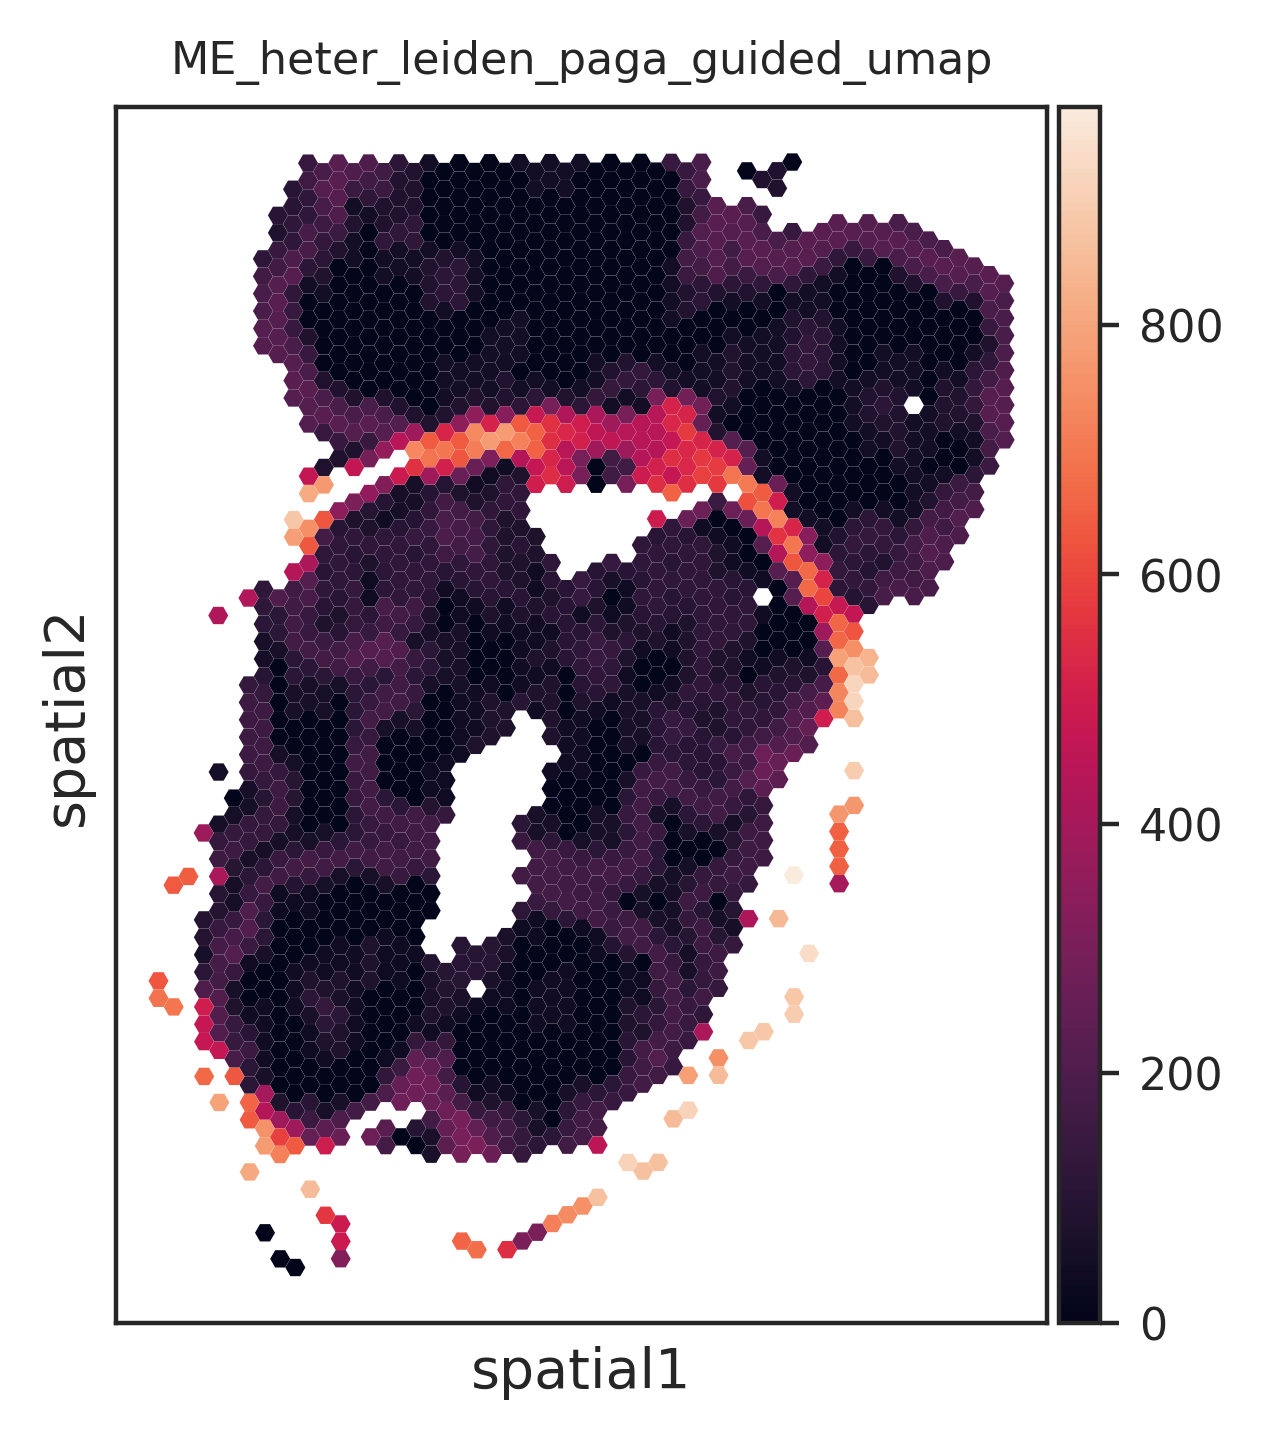

In [18]:
sc.pl.embedding(adata,basis='spatial',color=[heter_key],show=False,size=13,marker='H')
plt.gca().set_aspect('equal', adjustable='box') 
